In [20]:
import glob
import numpy as np
import torch
import matplotlib.pyplot as plt

from clana.optimize import simulated_annealing

%matplotlib inline

In [2]:
def get_filename_txt(text):
    return text[0:-2]+"txt"

def get_labels(fname):
    with open(fname) as f:
        lines = [line.rstrip() for line in f]
        return lines

file_list = glob.glob('raw_predictions/seen/*.pt')



In [3]:
single = file_list[2]
labels_list = get_labels(get_filename_txt(single))


In [4]:
print(single)
t_single = torch.load(single)
t_single.size()
matrix = t_single.numpy()

raw_predictions/seen\bit-f32-protonet_3.pt


In [29]:
def reordering(cm: np.ndarray, labels: list, order: list):

    cm2 = np.ndarray(cm.shape)

    for x in range(cm.shape[0]):
        for y in range(cm.shape[1]):
            nx = order.index(labels[x])
            ny = order.index(labels[y])
            cm2[nx, ny] = cm[x, y]

    return cm2

In [69]:
def get_average_accuracy(matrix):
    h,w = matrix.size()
    sums = 0
    for i in range(h):
        sums+=matrix[i,i]
    return sums/h


def get_average_matrix(matrix):
    sum_cm = (1.0 / matrix.sum(axis=1)).reshape(-1,1)
    average = sum_cm * matrix
    return average


%matplotlib inline
def plot_matrix(t_single,labels,arrangement=None):
    if arrangement is None:
        arrangement = labels
        
    t_new = np.ndarray(t_single.shape)
    
    height, width = t_single.shape
    for i in range(height):
        for j in range(width):
            i_n = arrangement.index(labels[i])
            j_n = arrangement.index(labels[j])
            t_new[i_n, j_n] = t_single[i, j]
        
    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(t_new)
#     im = ax.imshow(t_single)

    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    # ... and label them with the respective list entries
#     labels_clean = [n.replace("test:seen:", "") for n in labels]
#     ax.set_xticklabels(labels_clean)
#     ax.set_yticklabels(labels_clean)
    arrangement_clean = [n.replace("test:seen:", "") for n in arrangement]
    ax.set_xticklabels(arrangement_clean)
    ax.set_yticklabels(arrangement_clean)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
    
    for i in range(height):
        for j in range(width):
            i_n = arrangement.index(labels[i])
            j_n = arrangement.index(labels[j])
#             i_n = i
#             j_n = j
            num = round( float(t_single[i, j]) , 2) 
#             num = round( float(t_single[i_n, j_n]) , 2) 
            #num = t_single[i, j].item()
#             text = ax.text(j, i, num, ha="center", va="center", color="w")
            text = ax.text(j_n, i_n, num, ha="center", va="center", color="w")
    #ax.set_title("Harvest of local farmers (in tons/year)")
    fig.tight_layout()
    plt.show()

def load_data(rootname):
    labels = get_labels(get_filename_txt(rootname))
    
    tensor = torch.load(rootname)
    matrix = tensor.numpy()
    return matrix, labels
    

# file_list = glob.glob('raw_predictions/seen/*.pt')    
# average, labels_list = load_data(file_list[1])
# print(file_list[1])

# results = simulated_annealing(current_cm=matrix, current_perm=None)
# plot_matrix(get_average_matrix(results.cm), [labels_list[idx] for idx in results.perm])
# plot_matrix(average,labels_list,arrangement=[
#      'test:seen:icq',
#      'test:seen:aim',
#      'test:seen:email',
#      'test:seen:gmail',
#      'test:seen:sftp',
#      'test:seen:ftps',
#      'test:seen:scp',
#      'test:seen:skype',
#      'test:seen:facebook',
#      'test:seen:hangouts',
#      'test:seen:youtube',
#      'test:seen:netflix',
#      'test:seen:vimeo',
#      'test:seen:spotify',
#      'test:seen:torrent',
# ])






In [56]:
tt=[
    'test:seen:icq',
    'test:seen:aim',
    'test:seen:facebook',
    'test:seen:gmail',
    'test:seen:hangouts',
    'test:seen:skype',
    'test:seen:email',
    'test:seen:sftp',
    'test:seen:torrent',
    'test:seen:ftps',
    'test:seen:spotify',
    'test:seen:netflix',
    'test:seen:scp',
    'test:seen:youtube',
    'test:seen:vimeo',
]
print(len(labels_list))
print(len(tt))
for l in tt:
    if l not in labels_list:
        print(l)

15
14
test:seen:torrenttest:seen:ftps


In [87]:
average, labels_list = load_data("raw_predictions/seen/bit-f32-protonet_1.pt")

In [97]:
labels_list

['test:seen:aim',
 'test:seen:email',
 'test:seen:facebook',
 'test:seen:ftps',
 'test:seen:gmail',
 'test:seen:hangouts',
 'test:seen:icq',
 'test:seen:youtube',
 'test:seen:netflix',
 'test:seen:scp',
 'test:seen:sftp',
 'test:seen:skype',
 'test:seen:spotify',
 'test:seen:vimeo',
 'test:seen:torrent']

In [96]:
np.diag(average) / average.sum(axis=1)

array([0.46402586, 0.39415145, 0.77902526, 0.54215765, 0.61485106,
       0.40429083, 0.50963223, 0.47426945, 0.649167  , 0.915172  ,
       0.65146804, 0.38926387, 0.5201162 , 0.48717645, 0.5019    ],
      dtype=float32)

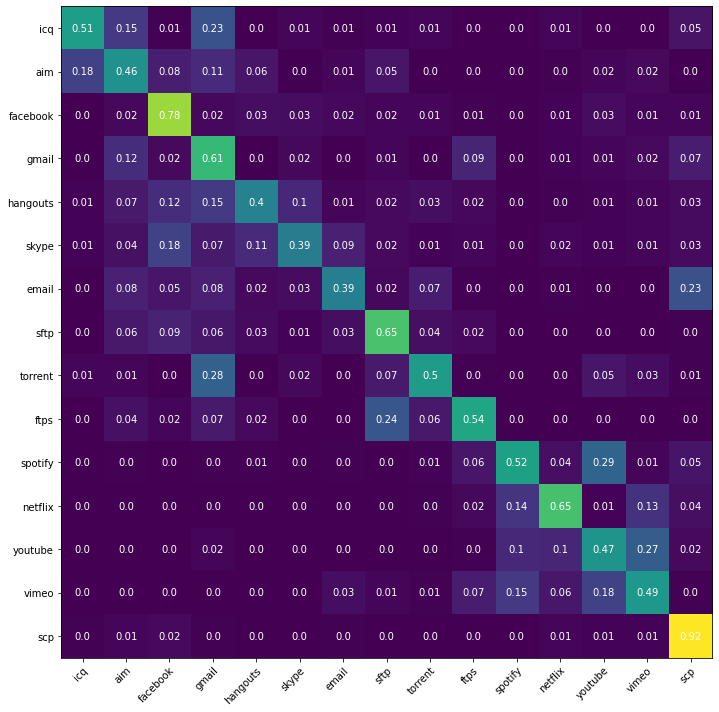

In [99]:
average, labels_list = load_data("raw_predictions/seen/bit-f32-protonet_1.pt")
plot_matrix(get_average_matrix(average), labels_list, [
    'test:seen:icq',
    'test:seen:aim',
    'test:seen:facebook',
    'test:seen:gmail',
    'test:seen:hangouts',
    'test:seen:skype',
    'test:seen:email',
    'test:seen:sftp',
    'test:seen:torrent',
    'test:seen:ftps',
    'test:seen:spotify',
    'test:seen:netflix',
    'test:seen:youtube',
    'test:seen:vimeo',
    'test:seen:scp',
])

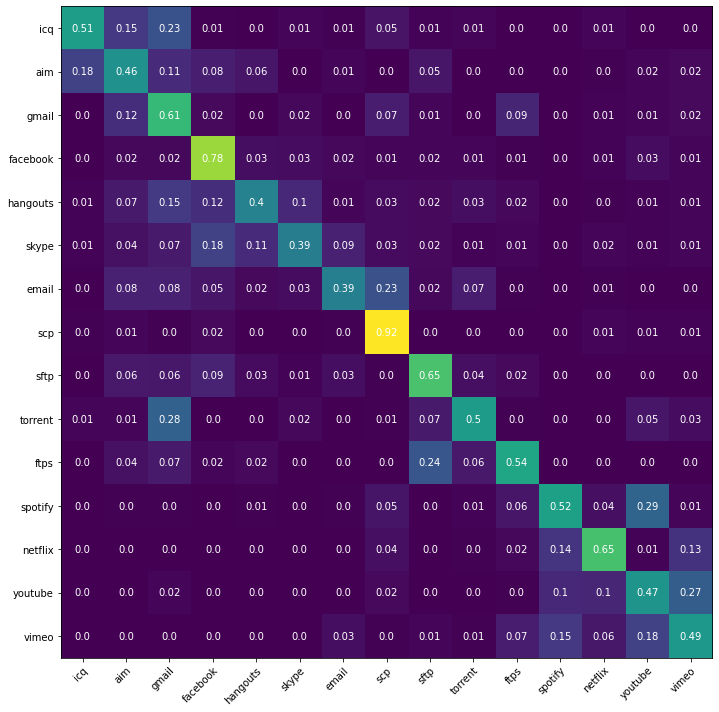

In [77]:
average, labels_list = load_data("raw_predictions/seen/bit-f32-protonet_1.pt")
plot_matrix(get_average_matrix(average), labels_list, [
    'test:seen:icq',
    'test:seen:aim',
    'test:seen:gmail',
    'test:seen:facebook',
    'test:seen:hangouts',
    'test:seen:skype',
    'test:seen:email',
    'test:seen:scp',
    'test:seen:sftp',
    'test:seen:torrent',
    'test:seen:ftps',
    'test:seen:spotify',
    'test:seen:netflix',
    'test:seen:youtube',
    'test:seen:vimeo',
])

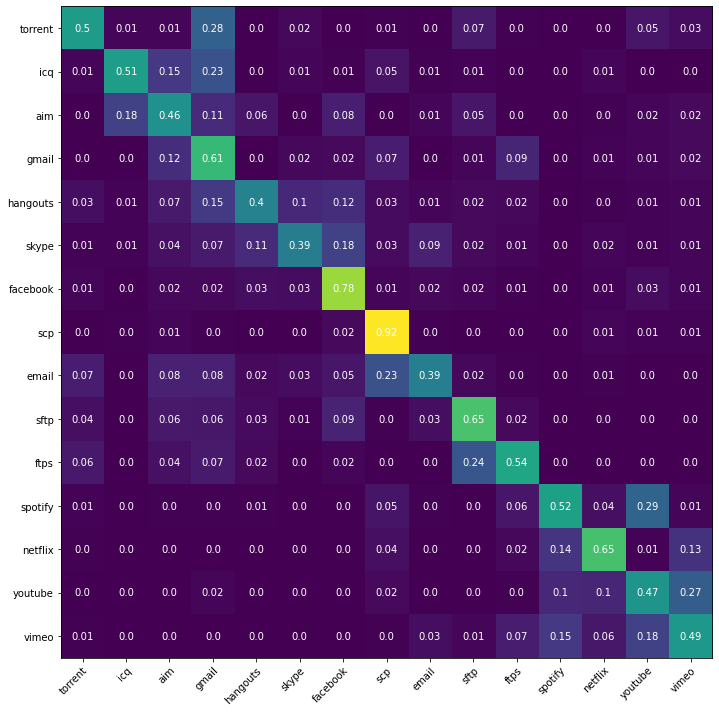

In [119]:
average, labels_list = load_data("raw_predictions/seen/bit-f32-protonet_1.pt")
plot_matrix(get_average_matrix(average), labels_list, [
    'test:seen:torrent',
    'test:seen:icq',
    'test:seen:aim',
    'test:seen:gmail',
    'test:seen:hangouts',
    'test:seen:skype',
    'test:seen:facebook',
    'test:seen:scp',
    'test:seen:email',
    'test:seen:sftp',
    'test:seen:ftps',
    'test:seen:spotify',
    'test:seen:netflix',
    'test:seen:youtube',
    'test:seen:vimeo',
])

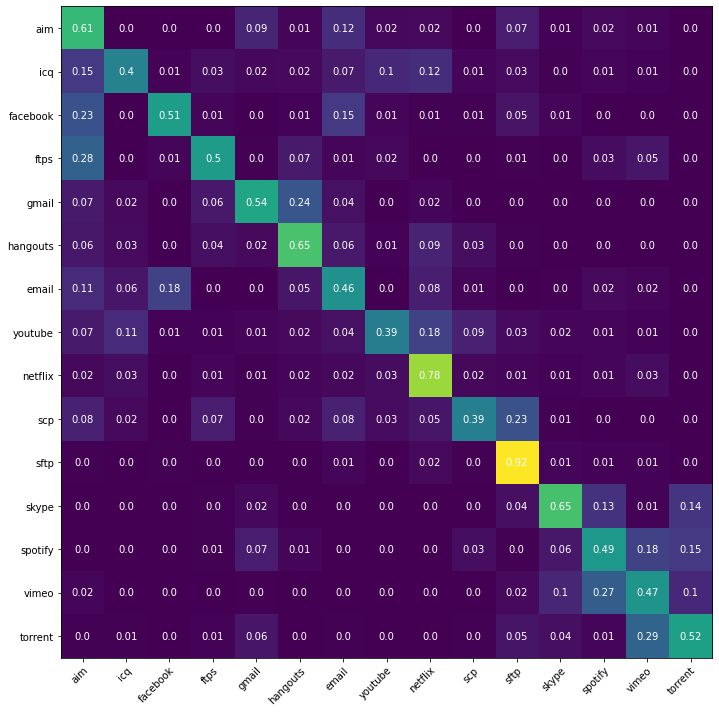

In [43]:
# Load
matrix, labels_list = load_data("raw_predictions/seen/bit-f32-protonet_1.pt")
# Initial Optimization
results = simulated_annealing(current_cm=new_matrix, current_perm=None, deterministic=True)
# Manual Editing
matrix = results.cm
labels_list = [labels_list[idx] for idx in results.perm]
new_order = [n for n in labels_list]
new_order.remove('test:seen:aim')
new_order.remove('test:seen:icq')
new_order.insert(0, 'test:seen:icq')
new_order.insert(0, 'test:seen:aim')
new_matrix = reordering(matrix, labels_list, new_order)

# Visualization
plot_matrix(get_average_matrix(new_matrix), new_order)

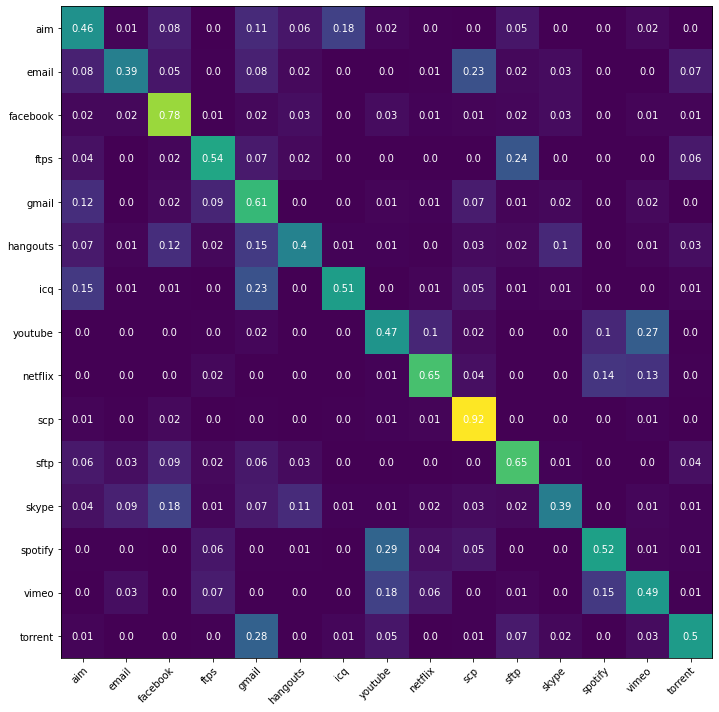

In [48]:
average, labels_list = load_data("raw_predictions/seen/bit-f32-protonet_1.pt")
plot_matrix(get_average_matrix(average), labels_list)

In [109]:
labels_list

['test:seen:BitTorrent',
 'test:seen:Facetime',
 'test:seen:FTP',
 'test:seen:Gmail',
 'test:seen:MySQL',
 'test:seen:Outlook',
 'test:seen:Skype',
 'test:seen:SMB',
 'test:seen:Weibo',
 'test:seen:WorldOfWarcraft',
 'test:seen:Cridex',
 'test:seen:Geodo',
 'test:seen:Htbot',
 'test:seen:Miuref',
 'test:seen:Neris',
 'test:seen:Nsis-ay',
 'test:seen:Shifu',
 'test:seen:Tinba',
 'test:seen:Virut',
 'test:seen:Zeus']

In [110]:
[labels_list[idx] for idx in results.perm]

['test:seen:BitTorrent',
 'test:seen:Facetime',
 'test:seen:FTP',
 'test:seen:Gmail',
 'test:seen:MySQL',
 'test:seen:Outlook',
 'test:seen:Skype',
 'test:seen:SMB',
 'test:seen:Weibo',
 'test:seen:WorldOfWarcraft',
 'test:seen:Cridex',
 'test:seen:Geodo',
 'test:seen:Htbot',
 'test:seen:Miuref',
 'test:seen:Neris']

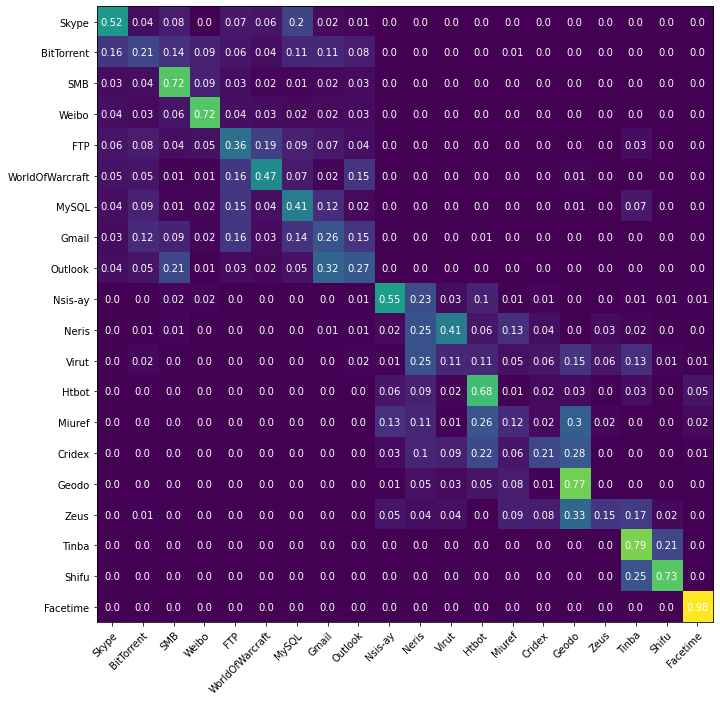

In [112]:
average, labels_list = load_data("raw_predictions/unseen/bit-f32-protonet_1.pt")
results = simulated_annealing(current_cm=average, current_perm=None)
plot_matrix(get_average_matrix(average), labels_list, [labels_list[idx] for idx in results.perm])

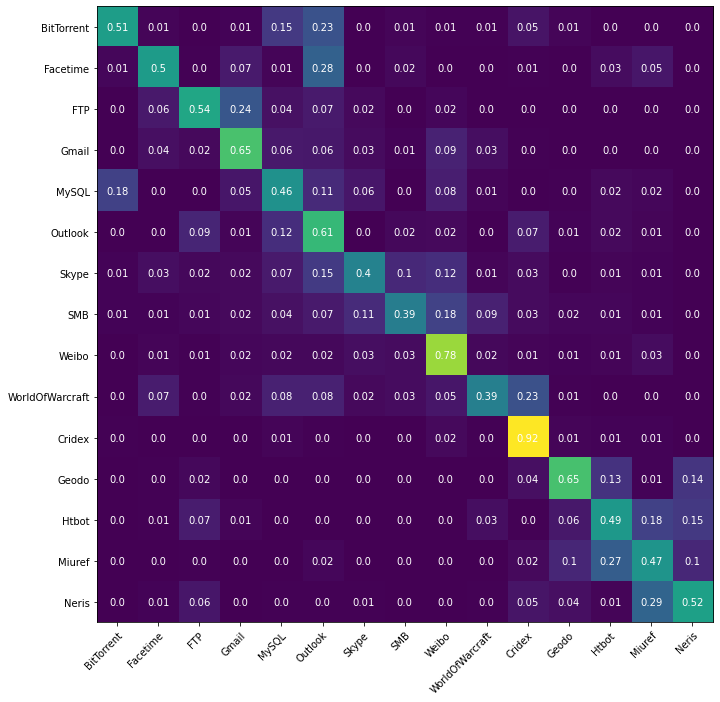

In [44]:
average, labels_list = load_data("raw_predictions/unseen/bit-f32-protonet_1.pt")
results = simulated_annealing(current_cm=matrix, current_perm=None)
plot_matrix(get_average_matrix(results.cm), [labels_list[idx] for idx in results.perm])

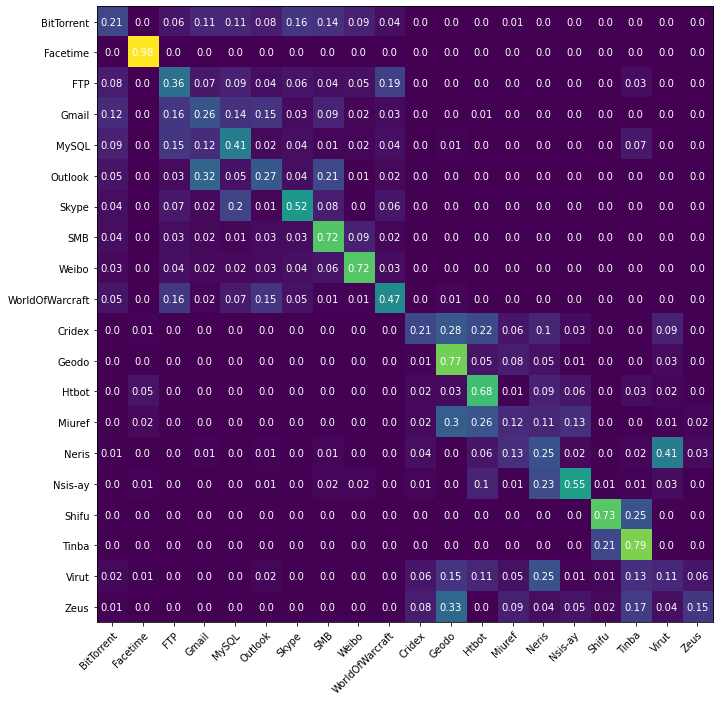

In [45]:
average, labels_list = load_data("raw_predictions/unseen/bit-f32-protonet_1.pt")
plot_matrix(get_average_matrix(average), labels_list)

c:\users\viplab\anaconda3\envs\packet\lib\site-packages\clana\optimize.py:112: RuntimeWarning: overflow encountered in exp
  hot_prob_thresh = min(1, np.exp(-(tmp_score - current_score) / temp))


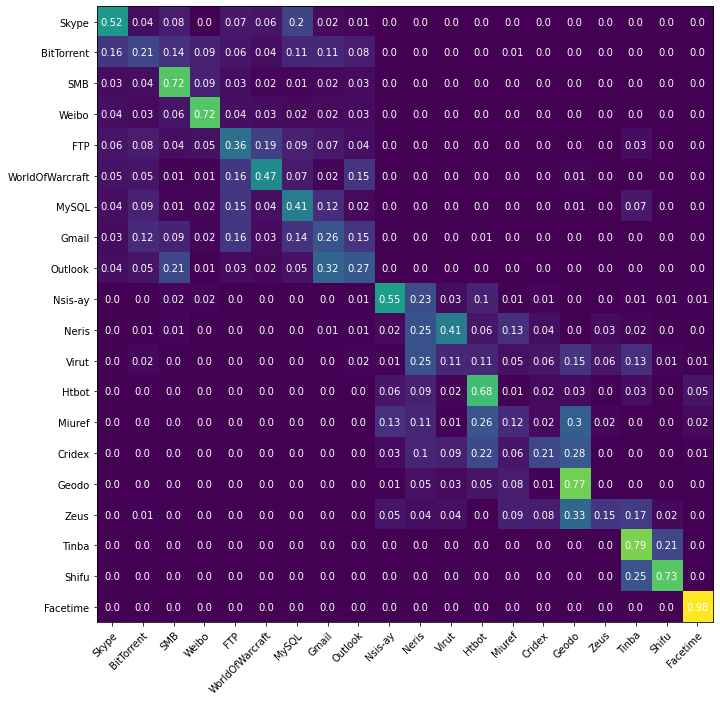

In [80]:
average, labels_list = load_data("raw_predictions/unseen/bit-f32-protonet_1.pt")
results = simulated_annealing(current_cm=average, current_perm=None)
plot_matrix(get_average_matrix(average), labels_list, [labels_list[idx] for idx in results.perm])

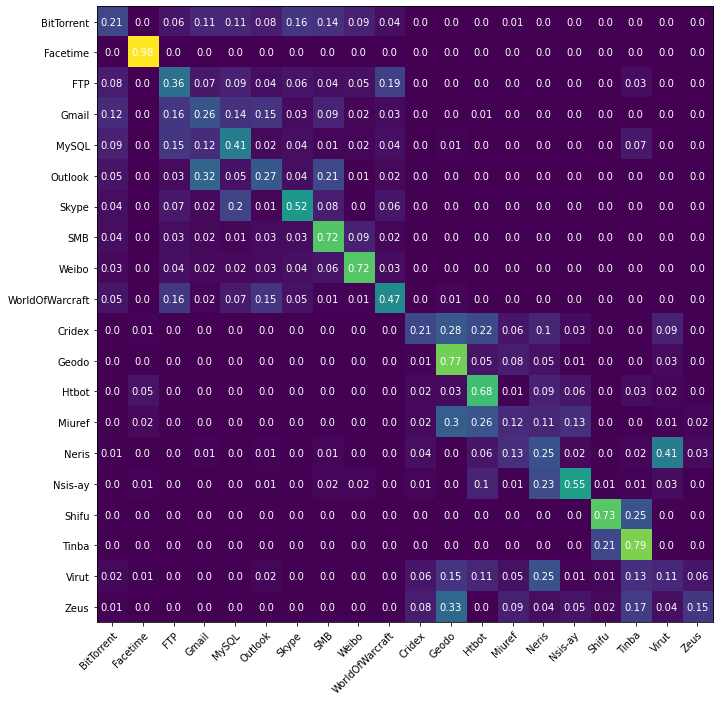

In [83]:
average, labels_list = load_data("raw_predictions/unseen/bit-f32-protonet_1.pt")
plot_matrix(get_average_matrix(average), labels_list)

c:\users\viplab\anaconda3\envs\packet\lib\site-packages\clana\optimize.py:112: RuntimeWarning: overflow encountered in exp
  hot_prob_thresh = min(1, np.exp(-(tmp_score - current_score) / temp))


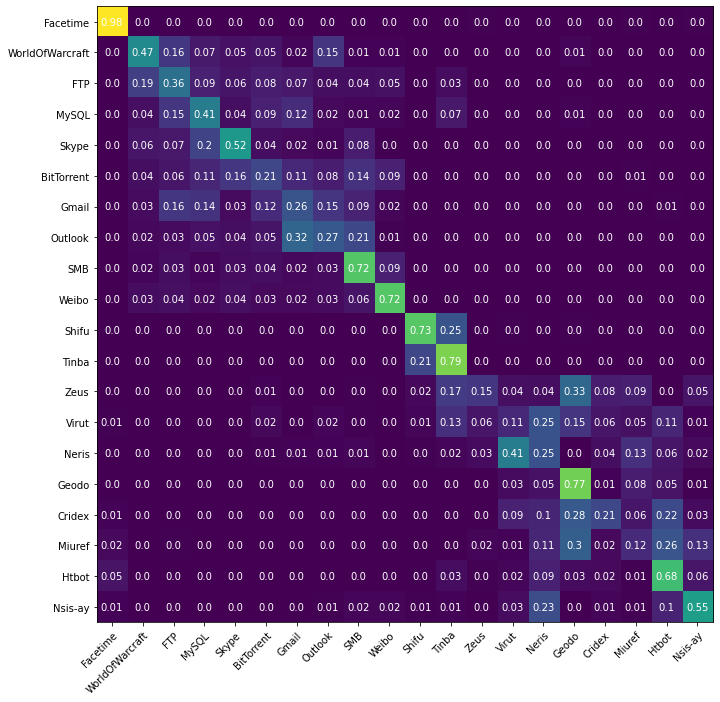

In [124]:
# SUCCESS ---------------------------
average, labels_list = load_data("raw_predictions/unseen/bit-f32-protonet_1.pt")
results_benign = simulated_annealing(current_cm=get_average_matrix(average)[:10,:10], current_perm=None)
results_malware = simulated_annealing(current_cm=get_average_matrix(average)[10:,10:], current_perm=None)
new_labels = [labels_list[idx] for idx in results_benign.perm] + [labels_list[idx + 10] for idx in results_malware.perm]
plot_matrix(get_average_matrix(average), labels_list, new_labels)

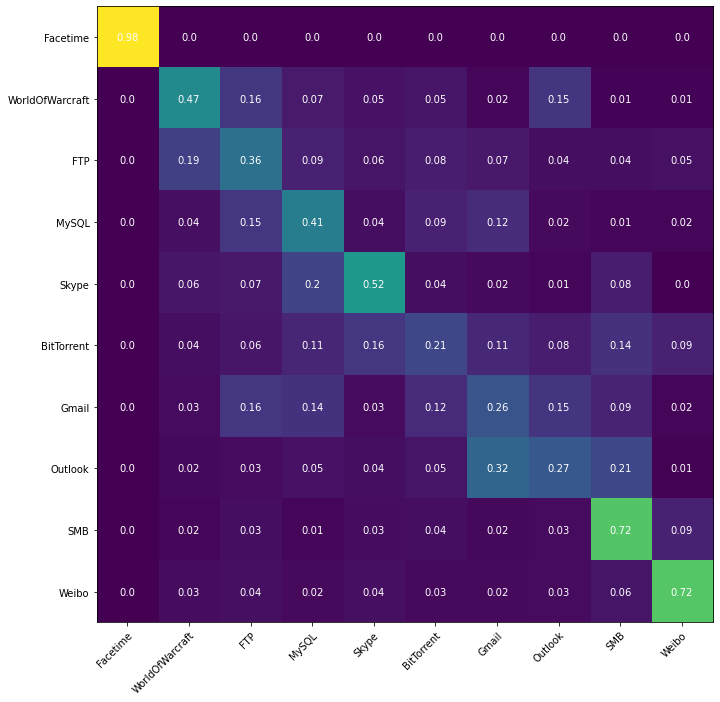

In [127]:
plot_matrix(get_average_matrix(average)[:10,:10], labels_list[:10], new_labels[:10])

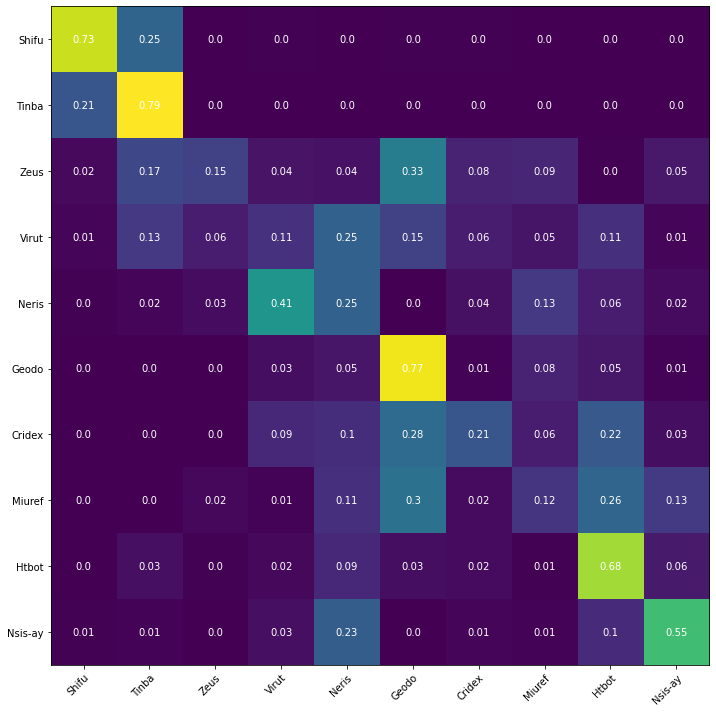

In [128]:
plot_matrix(get_average_matrix(average)[10:,10:], labels_list[10:], new_labels[10:])

c:\users\viplab\anaconda3\envs\packet\lib\site-packages\clana\optimize.py:112: RuntimeWarning: overflow encountered in exp
  hot_prob_thresh = min(1, np.exp(-(tmp_score - current_score) / temp))


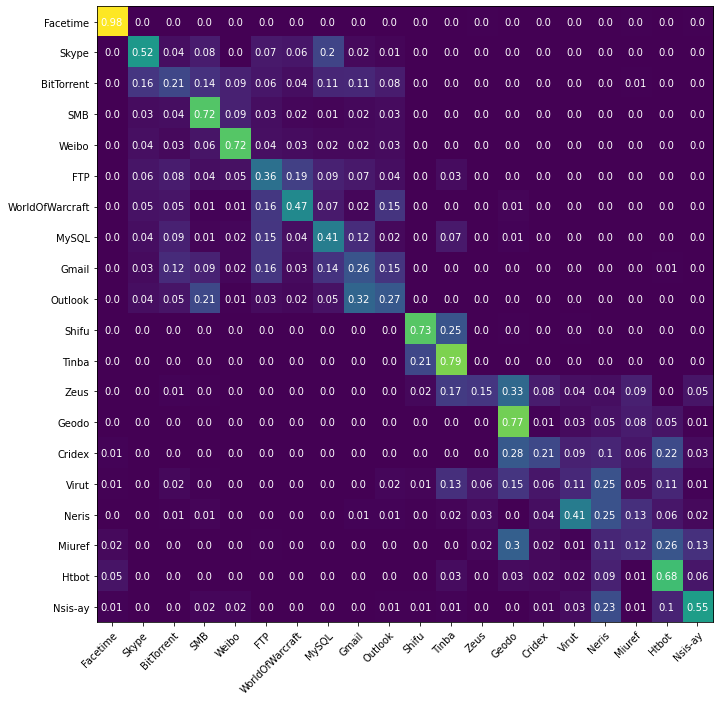

In [115]:
# FAIL ---------------------------
average, labels_list = load_data("raw_predictions/unseen/bit-f32-protonet_1.pt")
results_benign = simulated_annealing(current_cm=average[:10,:10], current_perm=None)
results_malware = simulated_annealing(current_cm=average[10:,10:], current_perm=None)
new_labels = [labels_list[idx] for idx in results_benign.perm] + [labels_list[idx + 10] for idx in results_malware.perm]
plot_matrix(get_average_matrix(average), labels_list, new_labels)

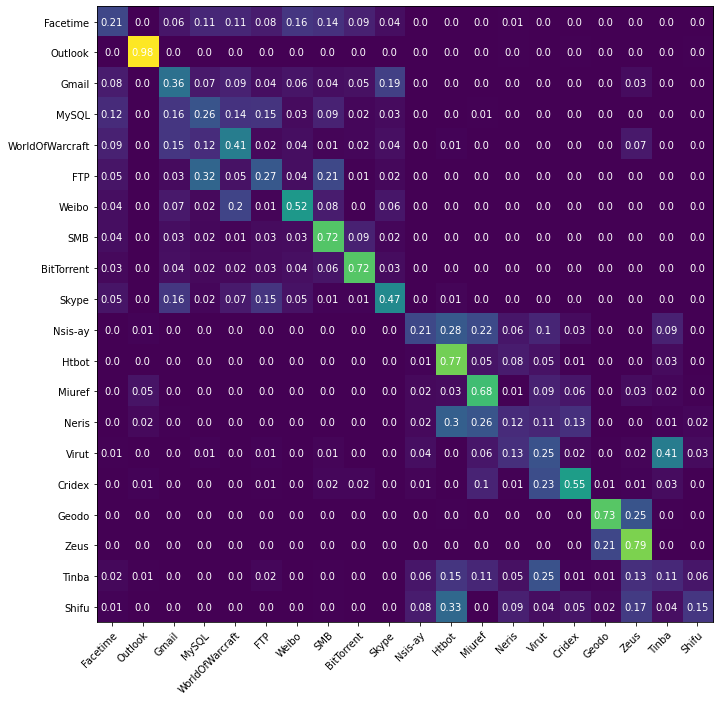

In [114]:
# FAIL ---------------------------
average, labels_list = load_data("raw_predictions/unseen/bit-f32-protonet_1.pt")
results_benign = simulated_annealing(current_cm=average[:10,:10], current_perm=None)
results_malware = simulated_annealing(current_cm=average[10:,10:], current_perm=None)
new_labels = [labels_list[idx] for idx in results_benign.perm] + [labels_list[idx + 10] for idx in results_malware.perm]
plot_matrix(get_average_matrix(average), new_labels)

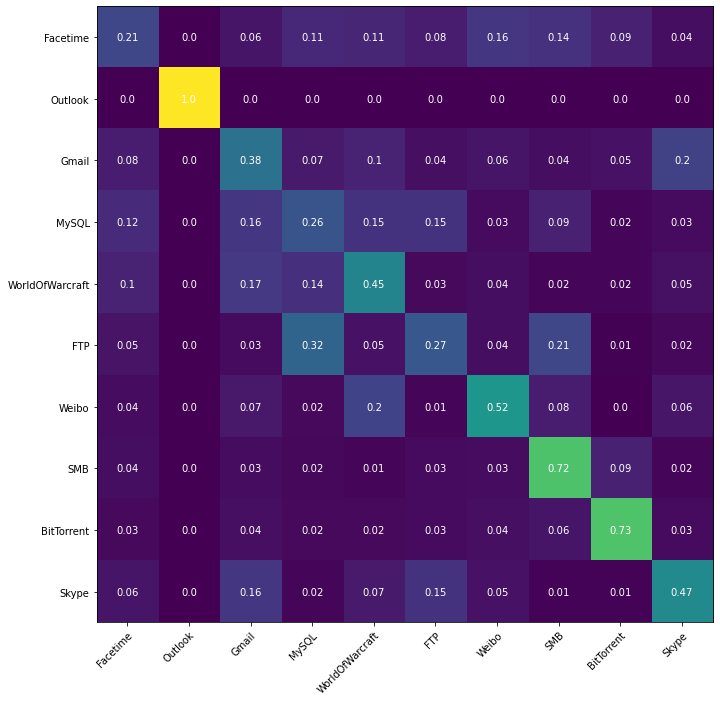

In [84]:
plot_matrix(get_average_matrix(average[:10,:10]), [labels_list[idx] for idx in results_benign.perm])

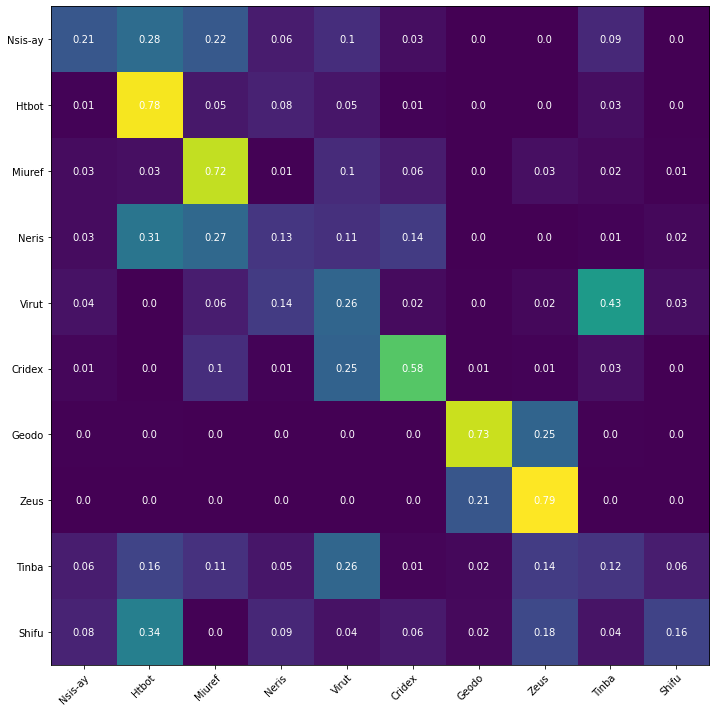

In [86]:
plot_matrix(get_average_matrix(average[10:,10:]), [labels_list[idx + 10] for idx in results_malware.perm])

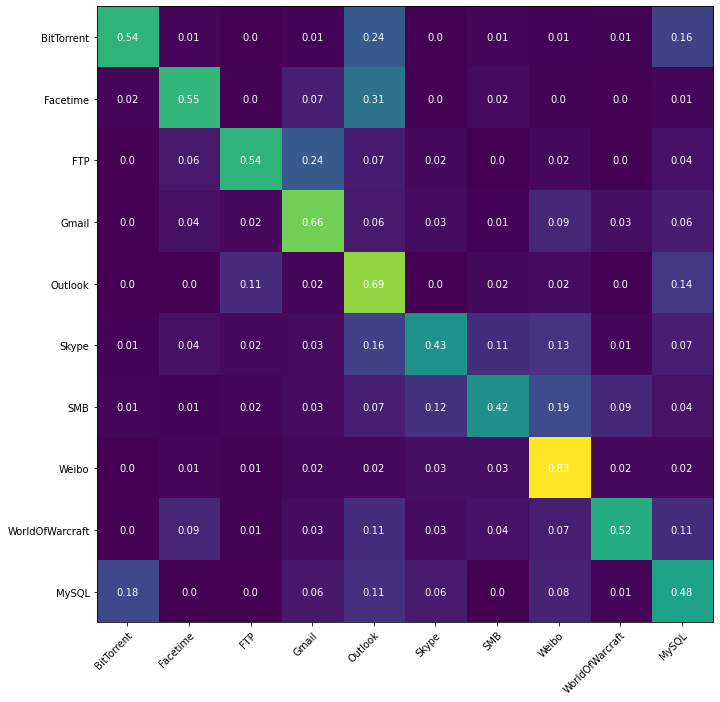

In [47]:
average, labels_list = load_data("raw_predictions/unseen/bit-f32-protonet_1.pt")
results = simulated_annealing(current_cm=matrix[0:10,0:10], current_perm=None)
plot_matrix(get_average_matrix(results.cm), [labels_list[idx] for idx in results.perm])

raw_predictions/unseen\bit-f32-protonet_2.pt


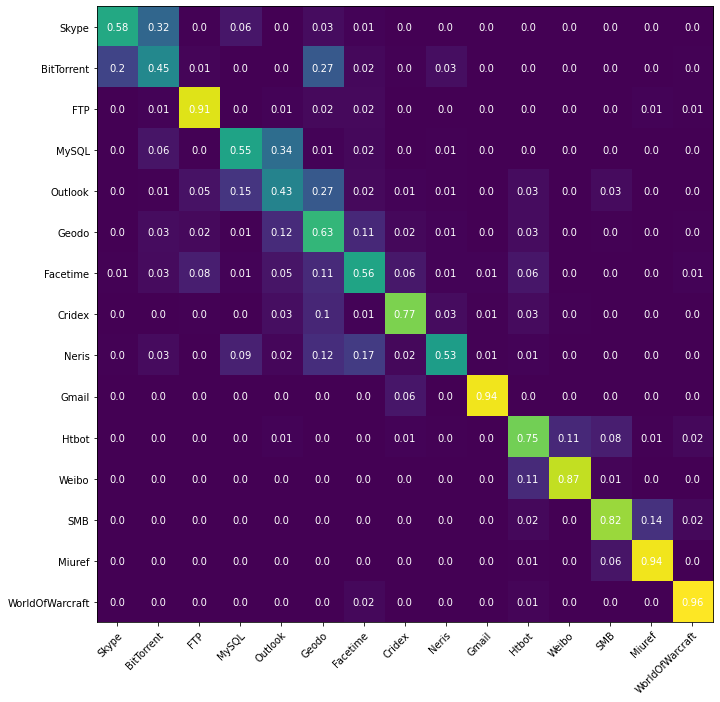

In [26]:

file_list = glob.glob('raw_predictions/unseen/*.pt')    
average, labels_list = load_data(file_list[0])
print(file_list[1])

results = simulated_annealing(current_cm=matrix, current_perm=None)
plot_matrix(get_average_matrix(results.cm), [labels_list[idx] for idx in results.perm])

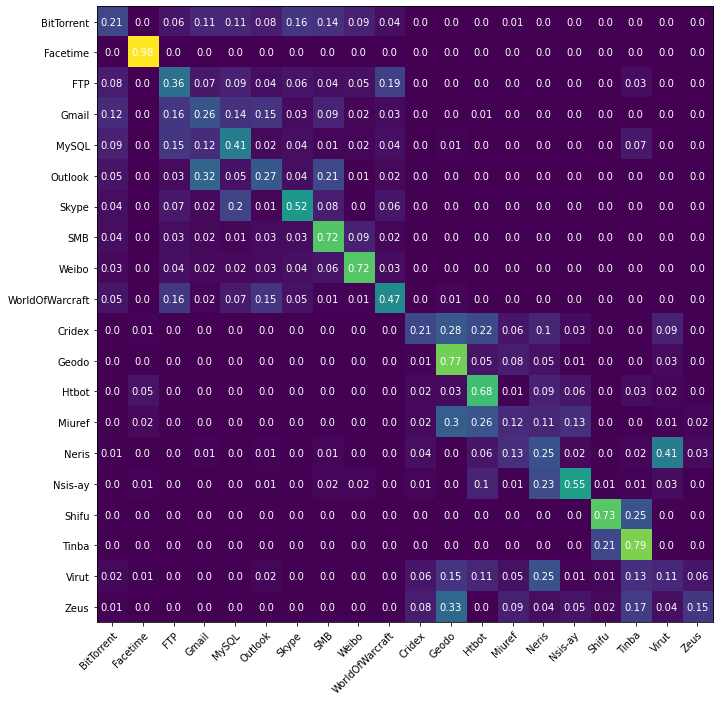

In [14]:
file_list = glob.glob('raw_predictions/unseen/*.pt')    
average, labels_list = load_data(file_list[0])
plot_matrix(average,labels_list,arrangement=[
    'test:seen:BitTorrent',
    'test:seen:Facetime',
    'test:seen:FTP',
    'test:seen:Gmail',
    'test:seen:MySQL',
    'test:seen:Outlook',
    'test:seen:Skype',
    'test:seen:SMB',
    'test:seen:Weibo',
    'test:seen:WorldOfWarcraft',
    'test:seen:Cridex',
    'test:seen:Geodo',
    'test:seen:Htbot',
    'test:seen:Miuref',
    'test:seen:Neris',
    'test:seen:Nsis-ay',
    'test:seen:Shifu',
    'test:seen:Tinba',
    'test:seen:Virut',
    'test:seen:Zeus'
])


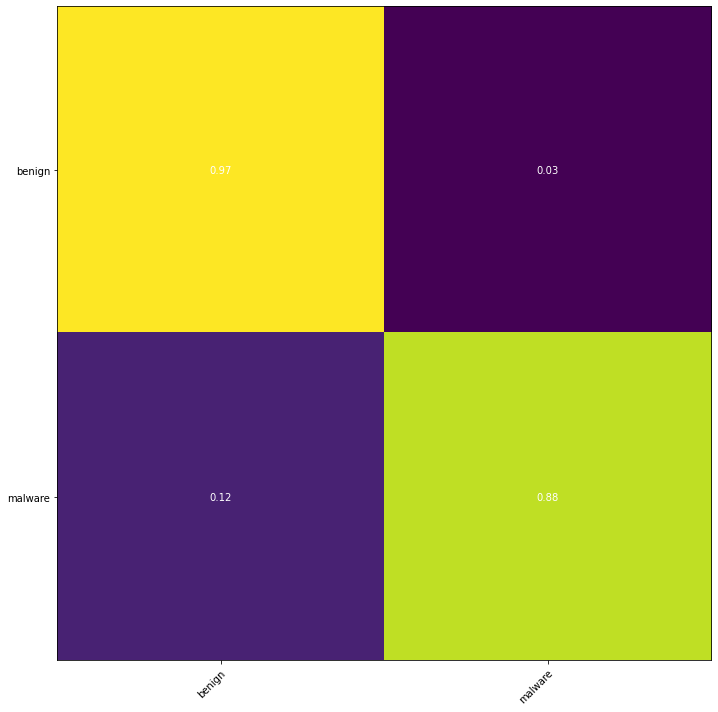

In [11]:

file_list = glob.glob('raw_predictions/maltest/*.pt')    
average, labels_list = load_data(file_list[0])
plot_matrix(average,labels_list,arrangement=None)


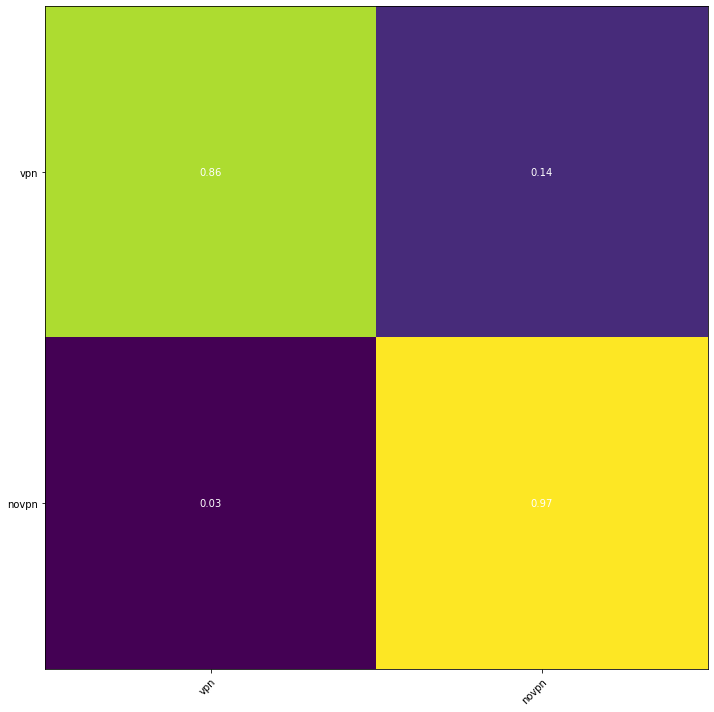

In [12]:
file_list = glob.glob('raw_predictions/vpntest/*.pt')    
average, labels_list = load_data(file_list[0])
plot_matrix(average,labels_list,arrangement=None)


In [7]:
import numpy as np
cm = t_single.numpy()
print(cm.shape)
sum_cm = (1.0 / cm.sum(axis=1)).reshape(-1,1)
print(sum_cm.shape)

recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)


(15, 15)
(15, 1)


In [8]:
def f1_score(cm):
    sum_cm = (1.0 / cm.sum(axis=1)).reshape(-1,1)

    recall = np.diag(cm) / np.sum(cm, axis = 1)
    precision = np.diag(cm) / np.sum(cm, axis = 0)
    
    f1=2 * recall * precision / (recall + precision) 
    return f1

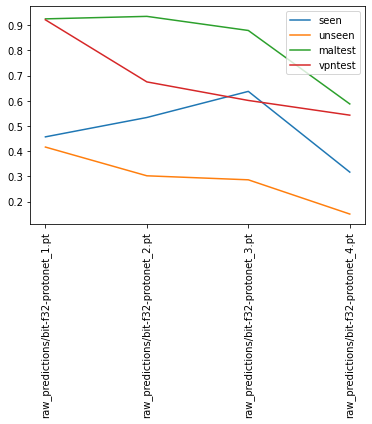

In [54]:
def test():
#     file_list = glob.glob('raw_predictions/**/*.pt')

    data = []
    
    categories =["seen", "unseen", "maltest", "vpntest"]
    for category in categories:
        file_list = [f"raw_predictions/{category}/bit-f32-protonet_{i}.pt" for i in range(1, 5)]
        f1s = []

        flist = list(filter(lambda n: category in n, file_list))
        file_names = [n.replace("raw_predictions/" + category, "raw_predictions") for n in flist]
        for f in flist:
            t_single = torch.load(f)
            matrix = t_single.numpy()
            f1 = f1_score(matrix).mean()
            f1s.append(f1)
            
        plt.plot(file_names, f1s, label=category)
        
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()
test()

['raw_predictions/maltest/bit-f32-protonet_1.pt', 'raw_predictions/maltest/bit-f32-protonet_2.pt', 'raw_predictions/maltest/bit-f32-protonet_3.pt', 'raw_predictions/maltest/bit-f32-protonet_4.pt']


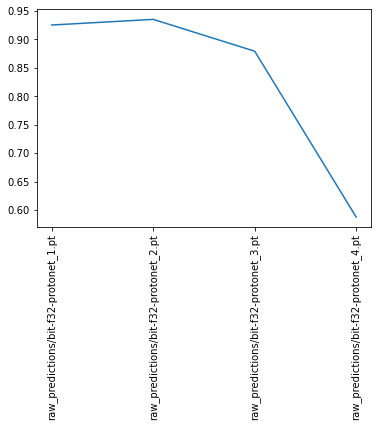

In [35]:

test("maltest")

['raw_predictions/vpntest/bit-f32-protonet_1.pt', 'raw_predictions/vpntest/bit-f32-protonet_2.pt', 'raw_predictions/vpntest/bit-f32-protonet_3.pt', 'raw_predictions/vpntest/bit-f32-protonet_4.pt']


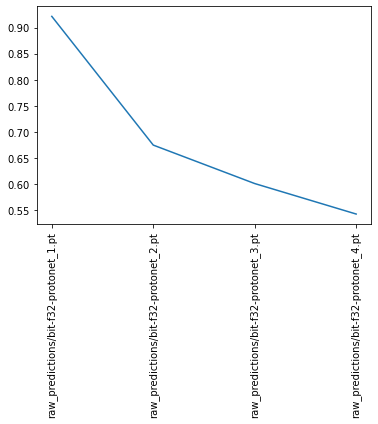

In [36]:
test("vpntest")

['raw_predictions/seen/bit-f32-protonet_1.pt', 'raw_predictions/seen/bit-f32-protonet_2.pt', 'raw_predictions/seen/bit-f32-protonet_3.pt', 'raw_predictions/seen/bit-f32-protonet_4.pt']


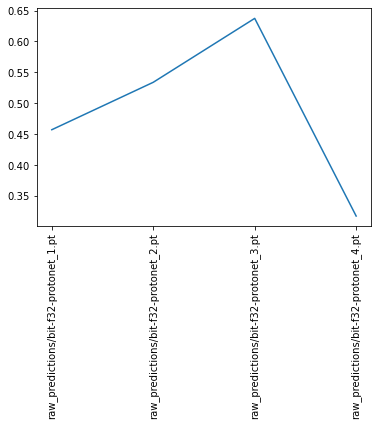

In [37]:
test("seen")

['raw_predictions/unseen/bit-f32-protonet_1.pt', 'raw_predictions/unseen/bit-f32-protonet_2.pt', 'raw_predictions/unseen/bit-f32-protonet_3.pt', 'raw_predictions/unseen/bit-f32-protonet_4.pt']


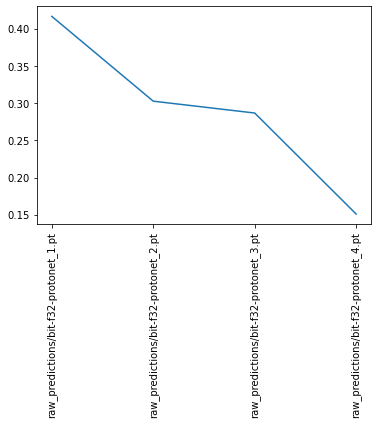

In [38]:
test("unseen")

In [31]:
dir(plt)

['Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'Axes',
 'Button',
 'Circle',
 'Figure',
 'FigureCanvasBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MouseButton',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'Number',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotTool',
 'Text',
 'TickHelper',
 'Widget',
 '_INSTALL_FIG_OBSERVER',
 '_IP_REGISTERED',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_auto_draw_if_interactive',
 '_backend_mod',
 '_code_objs',
 '_copy_docstring_and_deprecators',
 '_get_required_interactive_framework',
 '_interactive_bk',
 '_log',
 '_pylab_helpers',
 '_setup_pyplot_info_docstrings',
 '_warn_if_gui_ou

In [ ]:
file_list = glob.glob('raw_predictions/seen/*.pt')
f1s = []
for f in file_list:
    t_single = torch.load(f)
    matrix = t_single.numpy()
    f1 = f1_score(matrix).mean()
    f1s.append(f1)
plt.xticks(rotation=90)
plt.bar(file_list, f1s)

In [11]:
f1=2 * recall * precision / (recall + precision) 
print(f1)

[0.09656858 0.32788906 0.9003138  0.9605255  0.1102458  0.5119843
 0.49412942 0.8169749  0.9065396  0.95314443 0.8051405  0.6749984
 0.5150971  0.8997228  0.5887279 ]


In [20]:
zeros

tensor([[3., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0.,